# Data Selection & Preparation

## Pandas Data Structures

### Series

In [4]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
 
d = { 'Netherlands': 17, 'US': 318, 'Canada': 35, 'France': 66,'UK': 64}
population = pd.Series(d)
print(population)

Canada          35
France          66
Netherlands     17
UK              64
US             318
dtype: int64


In [5]:
#filter for single value
print(population['US'])

318


In [6]:
#get subsets
print(population[['US','Canada','UK']])

US        318
Canada     35
UK         64
dtype: int64


In [7]:
#filter with operators
print(population[population > 60])

France     66
UK         64
US        318
dtype: int64


### Data Frames

In [8]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
 
d = { 'name': ['Bob','Bart','Bobby','David','Muster'],
      'occupation': ['Lawyer','Programmer','Teacher','Lawyer','Teacher'],
      'year': [2017, 2017, 2017, 2017, 2017],
      'salary': [40000, 24000, 31000, 20000, 30000]  
    }
 
frame = pd.DataFrame(d, columns=['name','occupation'])
print(frame)

     name  occupation
0     Bob      Lawyer
1    Bart  Programmer
2   Bobby     Teacher
3   David      Lawyer
4  Muster     Teacher


In [9]:
df = pd.DataFrame(d, index = ['Index1', 'Index2', 'Index3', 'Index4', 'Index5'])
 
print(df)

          name  occupation  salary  year
Index1     Bob      Lawyer   40000  2017
Index2    Bart  Programmer   24000  2017
Index3   Bobby     Teacher   31000  2017
Index4   David      Lawyer   20000  2017
Index5  Muster     Teacher   30000  2017


In [10]:
df_filtered = df.query('salary>=30000')
print(df_filtered)

          name occupation  salary  year
Index1     Bob     Lawyer   40000  2017
Index3   Bobby    Teacher   31000  2017
Index5  Muster    Teacher   30000  2017


In [65]:
df_filtered = df[(df.occupation == 'Teacher') & (df.year == 2017)]
print(df_filtered)

          name occupation  salary  year
Index3   Bobby    Teacher   31000  2017
Index5  Muster    Teacher   30000  2017


In [12]:
df2 = df.groupby(["occupation"])[['name']].count()
print(df2)

            name
occupation      
Lawyer         2
Programmer     1
Teacher        2


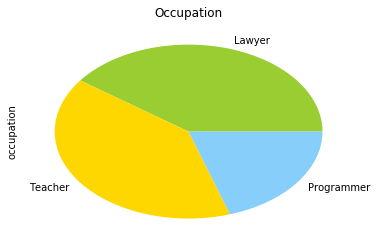

In [66]:
# plot data
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','green','blue','orange','white','brown']
df['occupation'].value_counts().plot(kind='pie',title='Occupation',colors=colors)
plt.show()

In [14]:
df3 = df.replace('NA()',0)

### Merge, join, and concatenate¶

In [15]:
d1 = { 'name': ['Bob','Bart','Bobby','David','Muster1'],
      'occupation': ['Lawyer','Programmer','Teacher','Lawyer','Teacher'],
      'year': [2017, 2017, 2017, 2017, 2017],
      'salary': [40000, 24000, 31000, 20000, 30000]  
    }
   

d2 = { 'name': ['Bob','Bart','Bobby','David','Muster2'],
      'occupation': ['Lawyer','Programmer','Teacher','Lawyer','Teacher'],
      'year': [2018, 2018, 2018, 2018, 2018],
      'salary': [20000, 30000, 41000, 30000, 20000],
      'promotion':['y', 'y', 'n', 'n','y']
    }
df1 = pd.DataFrame(d1, index = ['Index1', 'Index2', 'Index3', 'Index4', 'Index5'])
df2 = pd.DataFrame(d2, index = ['Index1', 'Index2', 'Index3', 'Index4', 'Index5'])
frames = [df1, df2]

result = pd.concat(frames,keys=['x', 'y'])

print(result)

             name  occupation promotion  salary  year
x Index1      Bob      Lawyer       NaN   40000  2017
  Index2     Bart  Programmer       NaN   24000  2017
  Index3    Bobby     Teacher       NaN   31000  2017
  Index4    David      Lawyer       NaN   20000  2017
  Index5  Muster1     Teacher       NaN   30000  2017
y Index1      Bob      Lawyer         y   20000  2018
  Index2     Bart  Programmer         y   30000  2018
  Index3    Bobby     Teacher         n   41000  2018
  Index4    David      Lawyer         n   30000  2018
  Index5  Muster2     Teacher         y   20000  2018


In [16]:
result.loc['y']


,name,occupation,promotion,salary,year
Index1,Bob,Lawyer,y,20000,2018
Index2,Bart,Programmer,y,30000,2018
Index3,Bobby,Teacher,n,41000,2018
Index4,David,Lawyer,n,30000,2018
Index5,Muster2,Teacher,y,20000,2018


In [17]:
#default join='outer' behavior
result_joinouter = pd.concat(frames,axis=1)
print(result_joinouter)

           name  occupation  salary  year     name  occupation promotion  \
Index1      Bob      Lawyer   40000  2017      Bob      Lawyer         y   
Index2     Bart  Programmer   24000  2017     Bart  Programmer         y   
Index3    Bobby     Teacher   31000  2017    Bobby     Teacher         n   
Index4    David      Lawyer   20000  2017    David      Lawyer         n   
Index5  Muster1     Teacher   30000  2017  Muster2     Teacher         y   

        salary  year  
Index1   20000  2018  
Index2   30000  2018  
Index3   41000  2018  
Index4   30000  2018  
Index5   20000  2018  


In [18]:
result_joininner = pd.concat(frames,join='inner')
print(result_joininner)

           name  occupation  salary  year
Index1      Bob      Lawyer   40000  2017
Index2     Bart  Programmer   24000  2017
Index3    Bobby     Teacher   31000  2017
Index4    David      Lawyer   20000  2017
Index5  Muster1     Teacher   30000  2017
Index1      Bob      Lawyer   20000  2018
Index2     Bart  Programmer   30000  2018
Index3    Bobby     Teacher   41000  2018
Index4    David      Lawyer   30000  2018
Index5  Muster2     Teacher   20000  2018


In [19]:
result_append = df1.append(df2)
print(result_append )

           name  occupation promotion  salary  year
Index1      Bob      Lawyer       NaN   40000  2017
Index2     Bart  Programmer       NaN   24000  2017
Index3    Bobby     Teacher       NaN   31000  2017
Index4    David      Lawyer       NaN   20000  2017
Index5  Muster1     Teacher       NaN   30000  2017
Index1      Bob      Lawyer         y   20000  2018
Index2     Bart  Programmer         y   30000  2018
Index3    Bobby     Teacher         n   41000  2018
Index4    David      Lawyer         n   30000  2018
Index5  Muster2     Teacher         y   20000  2018


In [20]:
result_merge = pd.merge(df1, df2, on=['name', 'occupation'])
print(result_merge)

    name  occupation  salary_x  year_x promotion  salary_y  year_y
0    Bob      Lawyer     40000    2017         y     20000    2018
1   Bart  Programmer     24000    2017         y     30000    2018
2  Bobby     Teacher     31000    2017         n     41000    2018
3  David      Lawyer     20000    2017         n     30000    2018


In [21]:
result_merge = pd.merge(df1, df2,how='left', on=['name', 'occupation'])
print(result_merge)

      name  occupation  salary_x  year_x promotion  salary_y  year_y
0      Bob      Lawyer     40000    2017         y   20000.0  2018.0
1     Bart  Programmer     24000    2017         y   30000.0  2018.0
2    Bobby     Teacher     31000    2017         n   41000.0  2018.0
3    David      Lawyer     20000    2017         n   30000.0  2018.0
4  Muster1     Teacher     30000    2017       NaN       NaN     NaN


In [22]:
result_merge = pd.merge(df1, df2,how='right', on=['name', 'occupation'])
print(result_merge)

      name  occupation  salary_x  year_x promotion  salary_y  year_y
0      Bob      Lawyer   40000.0  2017.0         y     20000    2018
1     Bart  Programmer   24000.0  2017.0         y     30000    2018
2    Bobby     Teacher   31000.0  2017.0         n     41000    2018
3    David      Lawyer   20000.0  2017.0         n     30000    2018
4  Muster2     Teacher       NaN     NaN         y     20000    2018


In [23]:
result_merge = pd.merge(df1, df2,how='outer', on=['name', 'occupation'])
print(result_merge)

      name  occupation  salary_x  year_x promotion  salary_y  year_y
0      Bob      Lawyer   40000.0  2017.0         y   20000.0  2018.0
1     Bart  Programmer   24000.0  2017.0         y   30000.0  2018.0
2    Bobby     Teacher   31000.0  2017.0         n   41000.0  2018.0
3    David      Lawyer   20000.0  2017.0         n   30000.0  2018.0
4  Muster1     Teacher   30000.0  2017.0       NaN       NaN     NaN
5  Muster2     Teacher       NaN     NaN         y   20000.0  2018.0


In [24]:
result_merge = pd.merge(df1, df2, on=['name', 'occupation'],how='inner',indicator=True)
print(result_merge)

    name  occupation  salary_x  year_x promotion  salary_y  year_y _merge
0    Bob      Lawyer     40000    2017         y     20000    2018   both
1   Bart  Programmer     24000    2017         y     30000    2018   both
2  Bobby     Teacher     31000    2017         n     41000    2018   both
3  David      Lawyer     20000    2017         n     30000    2018   both


## Dealing with Missing Values

In [41]:
result_missing = pd.merge(df1, df2,how='outer', on=['name', 'occupation'])
print(result_missing)

      name  occupation  salary_x  year_x promotion  salary_y  year_y
0      Bob      Lawyer   40000.0  2017.0         y   20000.0  2018.0
1     Bart  Programmer   24000.0  2017.0         y   30000.0  2018.0
2    Bobby     Teacher   31000.0  2017.0         n   41000.0  2018.0
3    David      Lawyer   20000.0  2017.0         n   30000.0  2018.0
4  Muster1     Teacher   30000.0  2017.0       NaN       NaN     NaN
5  Muster2     Teacher       NaN     NaN         y   20000.0  2018.0


In [42]:
# Drop the columns where all elements are missing values: 
result_missing_1=result_missing.dropna(axis=1, how='all') 
print(result_missing_1)


      name  occupation  salary_x  year_x promotion  salary_y  year_y
0      Bob      Lawyer   40000.0  2017.0         y   20000.0  2018.0
1     Bart  Programmer   24000.0  2017.0         y   30000.0  2018.0
2    Bobby     Teacher   31000.0  2017.0         n   41000.0  2018.0
3    David      Lawyer   20000.0  2017.0         n   30000.0  2018.0
4  Muster1     Teacher   30000.0  2017.0       NaN       NaN     NaN
5  Muster2     Teacher       NaN     NaN         y   20000.0  2018.0


In [43]:
# Drop the columns where any of the elements are missing values 
result_missing_2=result_missing.dropna(axis=1, how='any')
print(result_missing_2)

      name  occupation
0      Bob      Lawyer
1     Bart  Programmer
2    Bobby     Teacher
3    David      Lawyer
4  Muster1     Teacher
5  Muster2     Teacher


In [67]:
# Keep only the rows which contain 2 missing values maximum 
result_missing_3=result_missing.dropna(thresh=2) 
print(result_missing_3)

      name  occupation  salary_x  year_x promotion  salary_y  year_y
0      Bob      Lawyer   40000.0  2017.0         y   20000.0  2018.0
1     Bart  Programmer   24000.0  2017.0         y   30000.0  2018.0
2    Bobby     Teacher   31000.0  2017.0         n   41000.0  2018.0
3    David      Lawyer   20000.0  2017.0         n   30000.0  2018.0
4  Muster1     Teacher   30000.0  2017.0       NaN       NaN     NaN
5  Muster2     Teacher       NaN     NaN         y   20000.0  2018.0


In [45]:
# Fill all missing values with the mean of the particular column 
result_missing_4=result_missing.fillna(result_missing.mean()) 
print(result_missing_4)

      name  occupation  salary_x  year_x promotion  salary_y  year_y
0      Bob      Lawyer   40000.0  2017.0         y   20000.0  2018.0
1     Bart  Programmer   24000.0  2017.0         y   30000.0  2018.0
2    Bobby     Teacher   31000.0  2017.0         n   41000.0  2018.0
3    David      Lawyer   20000.0  2017.0         n   30000.0  2018.0
4  Muster1     Teacher   30000.0  2017.0       NaN   28200.0  2018.0
5  Muster2     Teacher   29000.0  2017.0         y   20000.0  2018.0


In [49]:
# Fill any missing value in column 'A' with the column median 
result_missing_5=result_missing.fillna(result_missing['salary_x'].median()) 
print(result_missing_5) 


      name  occupation  salary_x   year_x promotion  salary_y   year_y
0      Bob      Lawyer   40000.0   2017.0         y   20000.0   2018.0
1     Bart  Programmer   24000.0   2017.0         y   30000.0   2018.0
2    Bobby     Teacher   31000.0   2017.0         n   41000.0   2018.0
3    David      Lawyer   20000.0   2017.0         n   30000.0   2018.0
4  Muster1     Teacher   30000.0   2017.0     30000   30000.0  30000.0
5  Muster2     Teacher   30000.0  30000.0         y   20000.0   2018.0


## Outlier Detection

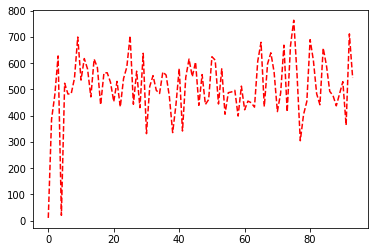

In [68]:
import numpy  as np
import matplotlib.pyplot as plt

arr = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543] 
plt.plot(arr, 'r--')
plt.show()


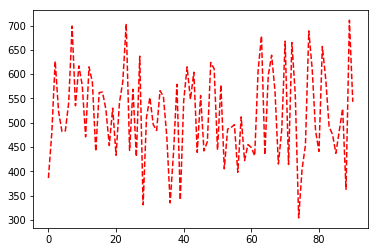

In [69]:
elements = np.array(arr) 

 
mean = np.mean(elements, axis=0) 
sd = np.std(elements, axis=0) 

 
final_list = [x for x in arr if (x > mean - 2 * sd)] 
final_list = [x for x in final_list if (x < mean + 2 * sd)] 

plt.plot( final_list, 'r--')
plt.show()


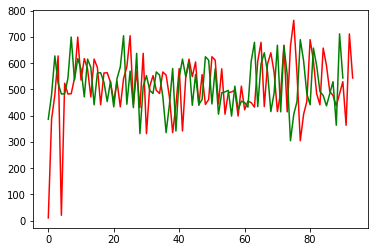

In [70]:
plt.plot(arr, 'r-')
plt.plot( final_list, 'g-')
plt.show()

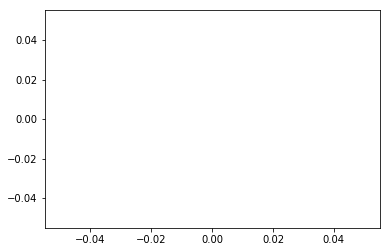

In [72]:
final_list_raus = [x for x in arr if (x < mean - 2 * sd)] 
final_list_raus = [x for x in final_list if (x > mean + 2 * sd)]
plt.plot( final_list_raus, 'r--')
plt.show()